## Ensemble Methods:

- Ensemble methods are a type of machine learning technique where multiple models (also known as "learners") are combined to solve a problem, often with the aim of improving performance compared to using a single model. The idea behind ensemble methods is that by combining different models, their weaknesses can cancel out, leading to better generalization and performance.

**1. Bagging (Bootstrap Aggregating):**

**Idea:** Train multiple models independently on different random subsets of the data and then combine their predictions.

**Goal:** Reduce variance and prevent overfitting.

**Common Algorithms:**

- Random Forest: A type of decision tree ensemble method where each tree is trained on a random subset of the data and features. Predictions are made by averaging the outputs of all trees (for regression) or by majority voting (for classification).

- Bagging (Base Model): Involves training multiple instances of the same algorithm (like decision trees) on different random samples of the training data, then combining their predictions.

**Example:**

- Random Forest uses a collection of decision trees trained using different subsets of data and features, which reduces the variance of individual decision trees.

**2. Boosting:**

**Idea:** Sequentially train models, with each new model focusing on the mistakes made by the previous models. The aim is to improve model accuracy by correcting errors iteratively.

**Goal:** Reduce bias and improve accuracy.

**Common Algorithms:**

- AdaBoost (Adaptive Boosting): Focuses on the incorrectly classified instances from previous models by assigning them higher weights so that the next model tries to correct those mistakes.

- Gradient Boosting: Trains new models that predict the residuals (errors) of the combined prediction from previous models. This makes the ensemble model improve step-by-step.

- XGBoost (Extreme Gradient Boosting): An optimized implementation of gradient boosting with regularization, which improves performance and reduces overfitting.

- LightGBM: Another efficient and fast implementation of gradient boosting that works well with large datasets.

**Example:**

- In Gradient Boosting, the first model fits the residuals of the data, the second model tries to correct the errors of the first one, and so on.

**3. Stacking (Stacked Generalization):**

**Idea:** Combine multiple different models to make predictions, where the predictions of the individual models are used as features for a new model (the "meta-model").

**Goal:** Leverage the strengths of different types of models to improve performance.

**Common Approach:** Use a set of base models (e.g., decision trees, logistic regression, SVMs) and train a meta-model (e.g., a logistic regression or decision tree) on the outputs of these base models to combine their predictions.

**Example:**

- In stacking, you might use multiple classifiers (like decision trees, logistic regression, and support vector machines) to predict a class. Then, a meta-model learns from the predictions of these base classifiers to make the final prediction.

### Advantages of Ensemble Methods:

**Improved Accuracy:** By combining multiple models, ensemble methods often achieve better performance than individual models.

**Better Generalization:** They can generalize better by reducing overfitting (in the case of bagging) or underfitting (in the case of boosting).

**Flexibility:** You can combine different types of models (e.g., decision trees, SVMs, neural networks) in stacking.

**Disadvantages of Ensemble Methods:**

**Computationally Expensive:** Training multiple models, especially in boosting and stacking, can be time-consuming and resource-intensive.

**Interpretability:** Ensembles, especially when many models are combined, can be harder to interpret compared to a single model.

# Random Forest: Concept

- It’s based on the concept of combining multiple decision trees to improve performance and reduce overfitting, using the ensemble technique called bagging (Bootstrap Aggregating).

#### How Random Forest Works

- Random Forest builds a “forest” of decision trees, each trained on a random subset of the data and random subset of features. Here's the core idea:

**Training Phase:**

**1. Bootstrap Sampling (Bagging):**

- Randomly select (with replacement) samples from the training data to create different training subsets for each tree.

**2. Feature Randomness:**

- At each split in a tree, instead of considering all features, it randomly selects a subset of features. This makes the trees diverse.

**3. Train Decision Trees:**

- Each tree is trained on its own random subset of the data and features.

**Prediction Phase:**

- For classification, each tree votes on the class label, and the majority vote is the final prediction.
- For regression, the prediction is the average of all tree outputs.

**Why It Works**

- By combining many weak learners (decision trees), Random Forest becomes a strong learner.
- The random sampling of data and features reduces correlation between individual trees, which is key to reducing variance and overfitting.

### Advantages of Random Forest

| Advantage                        | Explanation                                                   |
|----------------------------------|---------------------------------------------------------------|
|  High Accuracy                 | Often better than individual models.                          |
|  Robust to Overfitting         | Due to randomness and aggregation.                            |
|  Handles Non-linearity         | No need for feature scaling or linear assumptions.            |
|  Works on Classification & Regression | Versatile and flexible.                             |
|  Feature Importance            | Can rank the importance of features in prediction.            |
|  Handles Missing Values        | Fairly well, especially in scikit-learn's implementation.      |

In [12]:
# Step 1: Import required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Step 2: Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [14]:
# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Step 4: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Step 5: Make predictions
y_pred = rf_model.predict(X_test)

In [17]:
# Step 6: Evaluate the model
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.9649122807017544

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



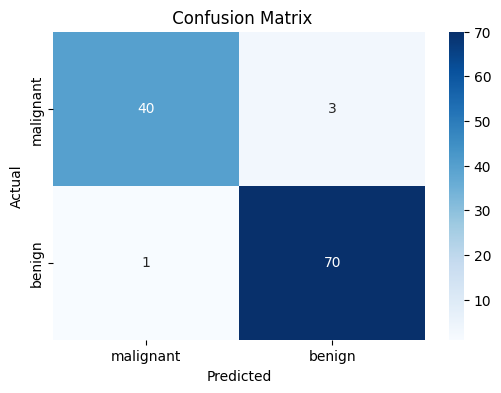

In [18]:
# Step 7: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title(" Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()